In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [2]:
g_files = glob.glob("galaxyData/galpos*")
g_files.sort()

calibration = glob.glob("galaxyData/calib*")

In [3]:
g_spectra_initial = [] 

for g_file in g_files:
    with open(g_file) as g_data:
        spectrum_rows = []    
        for j, row in enumerate(g_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row) 
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val) 
            tot_spectrum = tot_spectrum + np.float64(spec) 
        g_spectra_initial.append(tot_spectrum/len(spectrum_rows)) ### divison to average
        
g_spectra_initial = np.asarray(g_spectra_initial)

calibration_initial = [] 

for c_file in calibration:
    with open(c_file) as c_data:
        spectrum_rows = []    
        for j, row in enumerate(c_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row) 
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val) 
            tot_spectrum = tot_spectrum + np.float64(spec) 
        calibration_initial.append(tot_spectrum/len(spectrum_rows)) ### divison to average
        
calibration_initial = np.asarray(calibration_initial)

In [4]:
fstart = 1416
fstop = 1426
spacing = 0.009766
truncindex = 28
xinitial = np.arange(fstart,fstop,step=spacing)
x = xinitial[truncindex:]
##remove spike at 1416
g_spectra = g_spectra_initial[:,truncindex:]
calibration = calibration_initial[:,truncindex:]

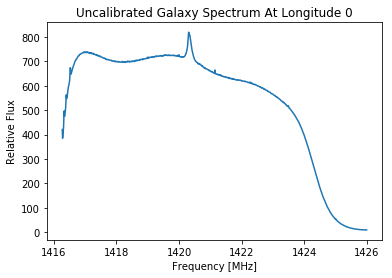

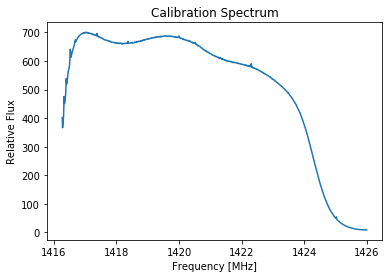

In [5]:
plt.plot(x,g_spectra[0,:])
plt.title('Uncalibrated Galaxy Spectrum At Longitude 0')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

plt.plot(x,calibration[0])
plt.title('Calibration Spectrum')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.show()

In [171]:
c = 299792458 #m/s

#freq = np.asarray([x[403],x[392],x[415],x[410],x[414],x[395],x[405],x[410],x[413],x[417]])
freq = np.asarray([x[403],x[392],x[405],x[375],x[380],x[390],x[405],x[410],x[413],x[417]])
print(freq)
wave21 = 21.10611405413 #cm
freq21 = (c*100)/wave21
freq21mhz = freq21/1e6
print('The frequency at 21.10611405413cm is',freq21mhz ,'MHz')

longitude = np.arange(0,100,step=10)

print('\n')
for i in range(0,10):
    print('Longitude',longitude[i],':',freq[i],'MHz')

[ 1420.209146  1420.10172   1420.228678  1419.935698  1419.984528
  1420.082188  1420.228678  1420.277508  1420.306806  1420.34587 ]
The frequency at 21.10611405413cm is 1420.4057517700055 MHz


Longitude 0 : 1420.209146 MHz
Longitude 10 : 1420.10172 MHz
Longitude 20 : 1420.228678 MHz
Longitude 30 : 1419.935698 MHz
Longitude 40 : 1419.984528 MHz
Longitude 50 : 1420.082188 MHz
Longitude 60 : 1420.228678 MHz
Longitude 70 : 1420.277508 MHz
Longitude 80 : 1420.306806 MHz
Longitude 90 : 1420.34587 MHz


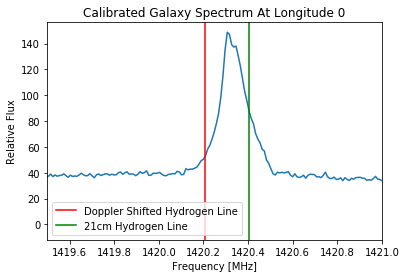

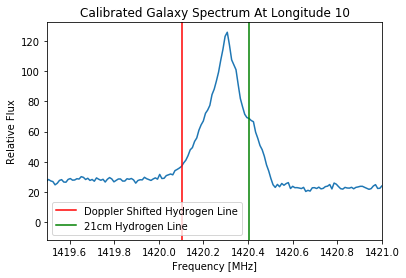

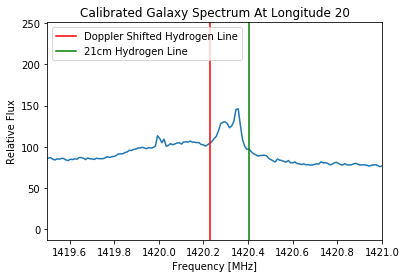

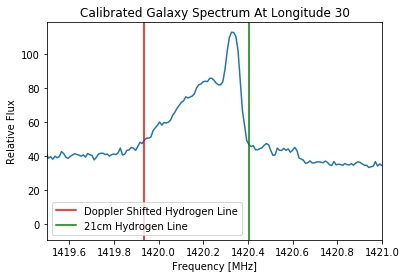

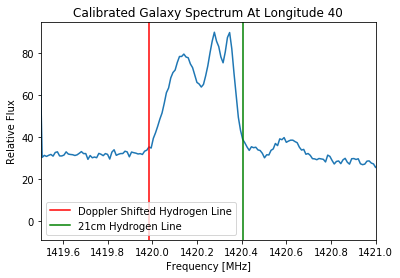

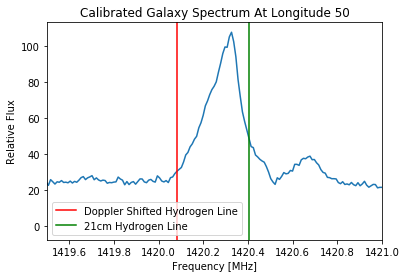

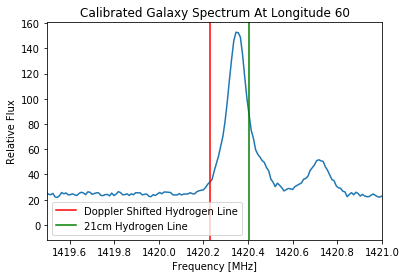

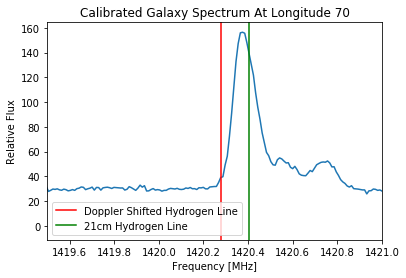

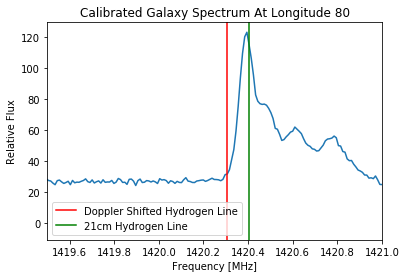

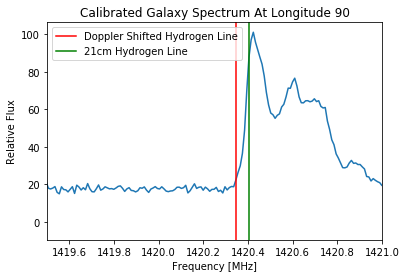

In [172]:
c_spectra = g_spectra - calibration

for i in range(0,10):
    #plt.plot(x[350:450],c_spectra[i,350:450])
    plt.plot(x,c_spectra[i,:])
    plt.xlim(1419.5,1421)
    plt.axvline(freq[i],c='r',label='Doppler Shifted Hydrogen Line')
    plt.axvline(freq21mhz,c='g',label='21cm Hydrogen Line')
    plt.title('Calibrated Galaxy Spectrum At Longitude '+str(i*10))
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Relative Flux')
    plt.legend()
    plt.show()

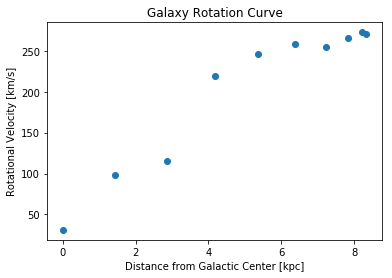

[ 41.49583806  64.16929215  37.37339187  99.21008482  88.90396933
  68.29173834  37.37339187  27.06727637  20.88360708  12.63871468]
[ 0.          1.4482258   2.852448    4.17        5.36084866  6.38881066
  7.22265187  7.83703646  8.21329666  8.34      ]


In [180]:
vlsr = [10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68]
v0 = 255 #km/s
vSun = v0*np.sin(longitude*np.pi/180)
deltav = ((freq21mhz-freq)*(c/1e3))/(freq21mhz)
vrot = deltav+vSun-vlsr

R0 = 8.34
R = R0*np.sin(longitude*np.pi/180)

plt.scatter(R,vrot)
plt.title('Galaxy Rotation Curve')
plt.xlabel('Distance from Galactic Center [kpc]')
plt.ylabel('Rotational Velocity [km/s]')
plt.show()
print(deltav)  #max 21cm velocity
print(R) #radius 

In [182]:
vconvert = 1e3 #m/km
rconvert = 3.086e+19 #m/pc
G = 6.674e-11
mconvert = 5.02785e-31 #kg/msolar
M = mconvert*(v0*vconvert)**2*(R0*rconvert)/G
print(M)

126077748175.95671
